# **Plant seedling classification**



## **Context**

Context:
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, hasrecently released a dataset containing images of unique plants belonging to 12 species at several growth stages. Can a weed be differentiated from  a crop seedling?T he ability to do so effectively can mean better crop yields and better stewardship of the environment. The  goal  of  the  project  is  to  create  a  classifier  capable  of  determining  a plant's species from a photo.

#### List of Species

* Black-grass
* Charlock
* Cleavers
* Common Chickweed
* Common wheat
* Fat Hen
* Loose Silky-bent
* Maize
* Scentless Mayweed
* Shepherds Purse
* Small-flowered Cranesbill
* Sugar beet

Data Description:



## **Dataset**

The data consists of 
Image file and label csv for 4750 records

## **Problem Statement**

The  goal  of  the  project  is  to  create  a  classifier  capable  of  determining  a plant's species from a photo



### **Importing the libraries**

In [1]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
#import os
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
#from keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from tensorflow.keras.optimizers import RMSprop,Adam 

### **Reading the Training Data**

In [2]:
# loading Images and labels
# Separating the images and labels
X_train = []
y_train = []
y_train = pd.read_csv("D:\\course\\Labels.CSV")
X_train = np.load('D:\\course\\Images.npy')

In [3]:
X_train.shape

(4750, 128, 128, 3)

In [4]:
y_train.describe()

Label
count               4750
unique                12
top     Loose Silky-bent
freq                 654

In [5]:
# Distinct values of seedlings
y_train['Label'].unique()

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

In [6]:
CATEGORIES = ["Small-flowered Cranesbill", "Fat Hen", "Shepherds Purse",
       "Common wheat", "Common Chickweed", "Charlock", "Cleavers",
       "Scentless Mayweed", "Sugar beet", "Maize", "Black-grass",
       "Loose Silky-bent"]

### **Printing image of each seedling**

In [7]:
df = y_train

In [8]:
smallfcrimg = []
fathenimg = []
spimg = []
cwimg = []
ccimg = []
charlockimg = []
climg = []
smimg = []
sbimg = []
maizeimg = []
bgimg = []
lsbimg = []

for i in range(0,4750):
    if (df.Label[i] == 'Small-flowered Cranesbill'):
           smallfcrimg.append(X_train[i]) 
    elif (df.Label[i] == 'Fat Hen'):
            fathenimg.append(X_train[i]) 
    elif (df.Label[i] == 'Shepherds Purse'):
            spimg.append(X_train[i]) 
    elif (df.Label[i] == 'Common wheat'):
            cwimg.append(X_train[i]) 
    elif (df.Label[i] == 'Common Chickweed'):
            ccimg.append(X_train[i]) 
    elif (df.Label[i] == 'Charlock'):
            charlockimg.append(X_train[i]) 
    elif (df.Label[i] == 'Cleavers'):
            climg.append(X_train[i]) 
    elif (df.Label[i] == 'Scentless Mayweed'):
            smimg.append(X_train[i]) 
    elif (df.Label[i] == 'Sugar beet'):
            sbimg.append(X_train[i]) 
    elif (df.Label[i] == 'Maize'):
            maizeimg.append(X_train[i]) 
    elif (df.Label[i] == 'Black-grass'):
            bgimg.append(X_train[i]) 
    elif (df.Label[i] == 'Loose Silky-bent'):
            lsbimg.append(X_train[i]) 

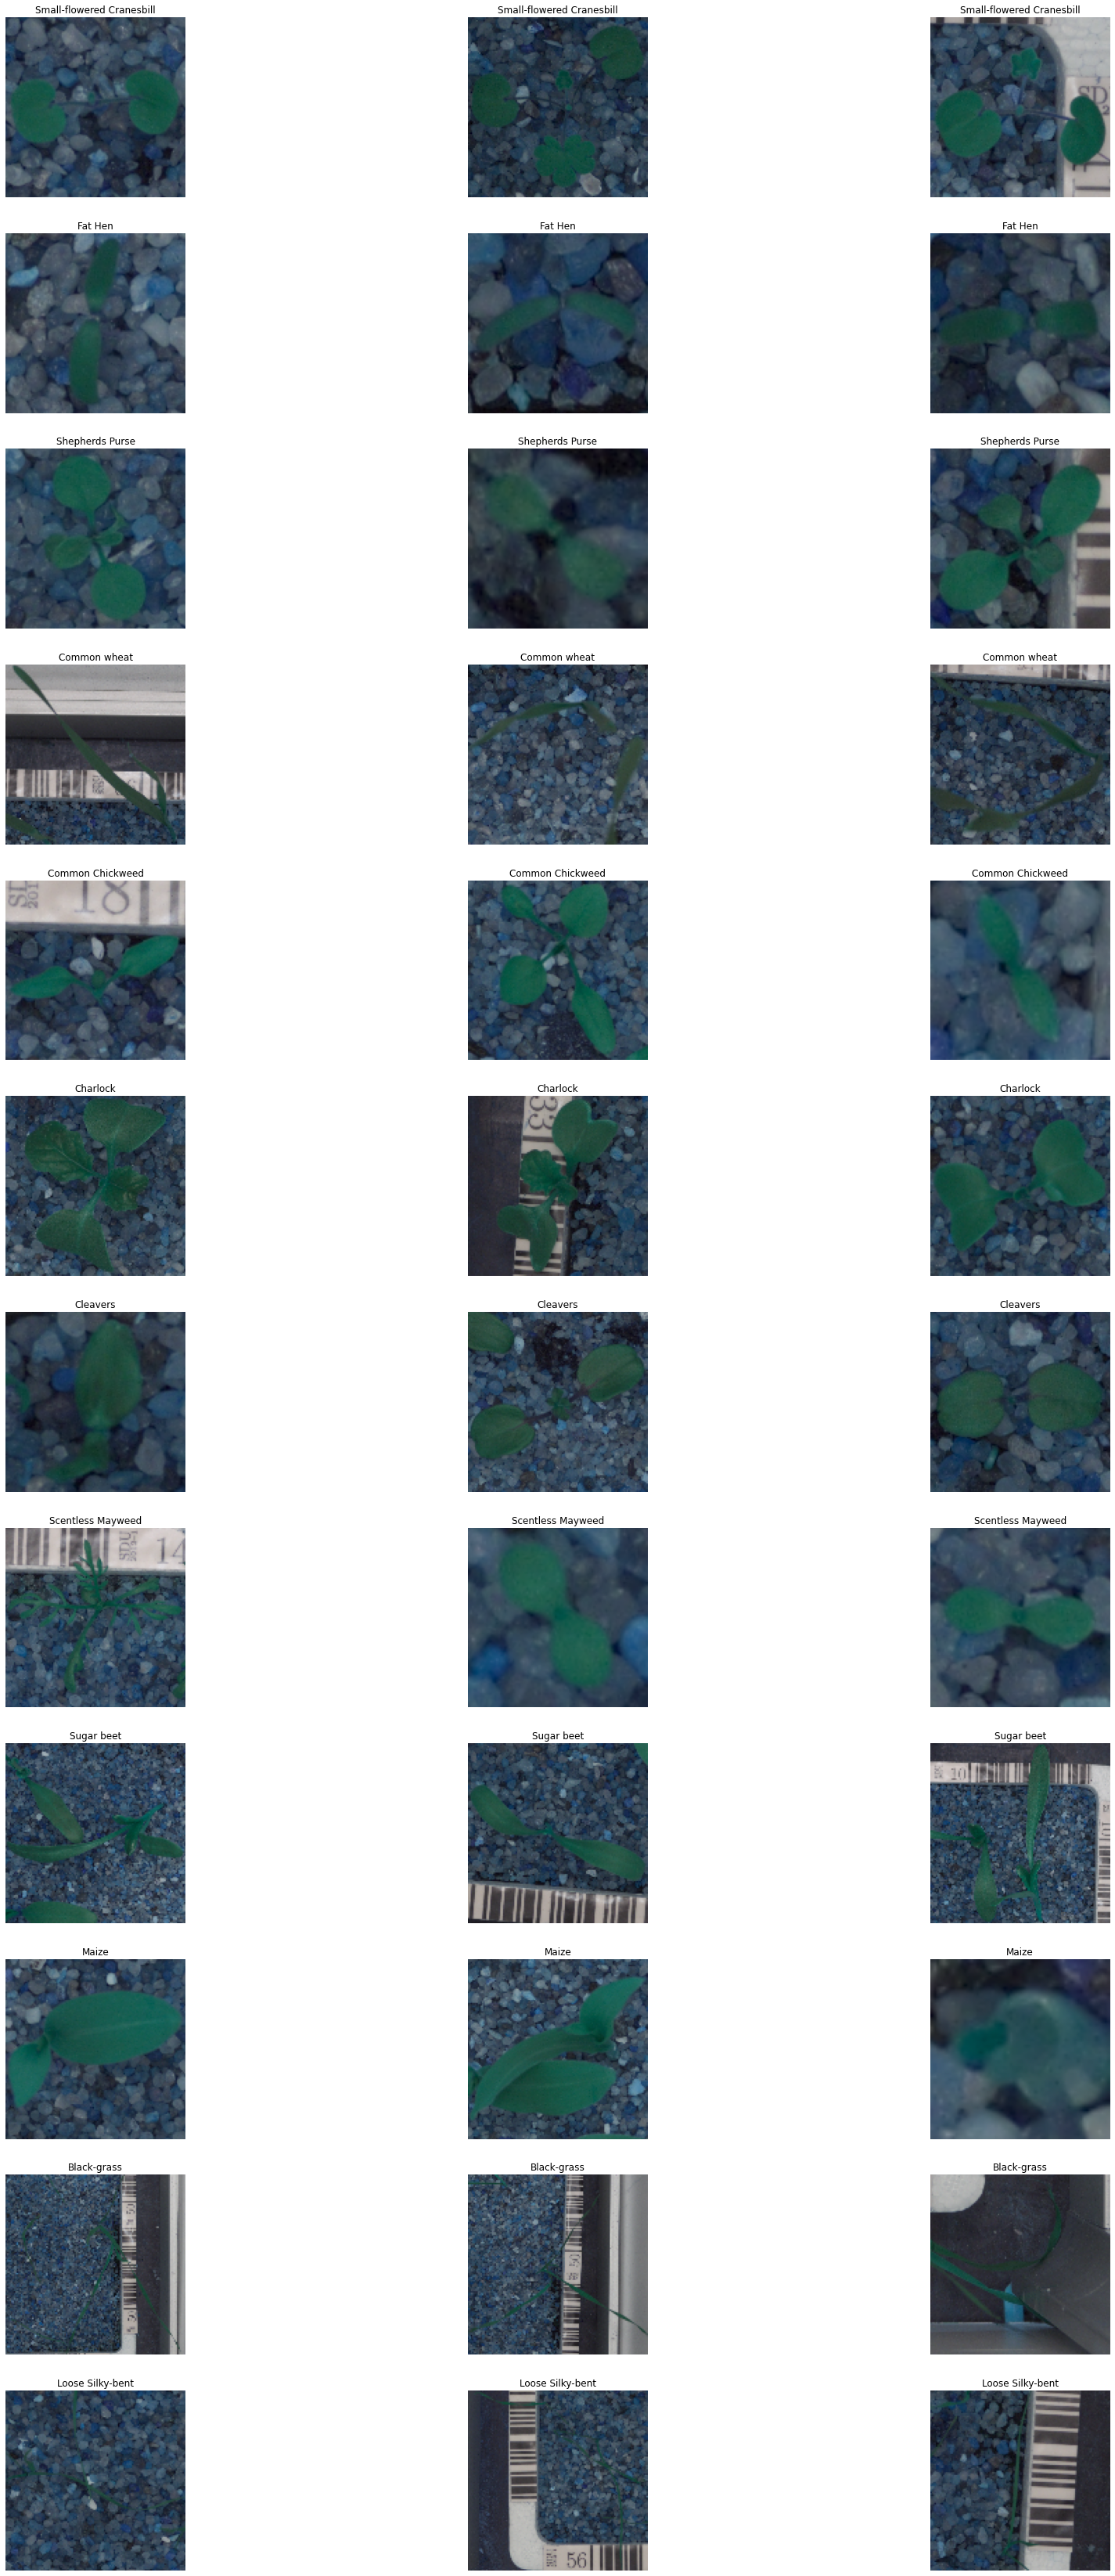

In [9]:
from keras.preprocessing import image
# plotting 2 x 3 image matrix
fig = plt.figure(figsize = (30,60))
for i in range(36):
    if i < 3:
        fp = smallfcrimg[i]
        label = 'Small-flowered Cranesbill'
    if i>=3 and i<6:
        fp = fathenimg[i-3]
        label = 'Fat Hen'
    if i>=6 and i<9:
        fp = spimg[i-6]
        label = 'Shepherds Purse'
    if i>=9 and i<12:
        fp = cwimg[i-9]
        label = 'Common wheat'
    if i>=12 and i<15:
        fp = ccimg[i-12]
        label = 'Common Chickweed'
    if i>=15 and i<18:
        fp = charlockimg[i-15]
        label = 'Charlock'
    if i>=18 and i<21:
        fp = climg[i-18]
        label = 'Cleavers'
    if i>=21 and i<24:
        fp = smimg[i-21]
        label = 'Scentless Mayweed'
    if i>=24 and i<27:
        fp = sbimg[i-24]
        label = 'Sugar beet'
    if i>=27 and i<30:
        fp = maizeimg[i-27]
        label = 'Maize'
    if i>=30 and i<33:
        fp = bgimg[i-30]
        label = 'Black-grass'
    if i>=33 and i<36:
        fp = lsbimg[i-33]
        label = 'Loose Silky-bent'
    #ax = fig.add_subplot(1, 2, i+1)
    
    # to plot without rescaling, remove target_size
    plt.subplot(12,3,i+1)
    plt.imshow(fp)    
    plt.title(label)
    plt.axis('off')
plt.show()

### **Data Preprocessing** 

#### Normalizing pixel values

In [10]:
# Normalizing pixel values  
X_train = X_train/255.0  

### **Exploratory Data Analysis**

In [11]:
df = y_train

In [12]:
print((df.Label.values == 'Small-flowered Cranesbill').argmax())
print((df.Label.values == 'Fat Hen').argmax())

0
496


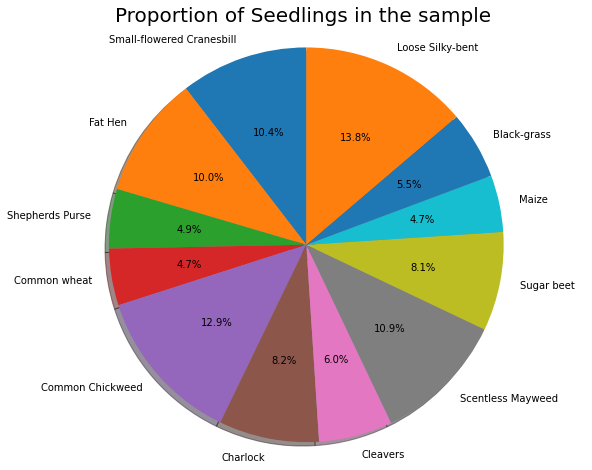

In [13]:
#plotting the pie chart 
labels = 'Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse','Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers','Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass','Loose Silky-bent'
sizes = [df.Label[df['Label']=='Small-flowered Cranesbill'].count(), df.Label[df['Label']=='Fat Hen'].count(),
         df.Label[df['Label']=='Shepherds Purse'].count(), df.Label[df['Label']=='Common wheat'].count(),
         df.Label[df['Label']=='Common Chickweed'].count(), df.Label[df['Label']=='Charlock'].count(),
         df.Label[df['Label']=='Cleavers'].count(), df.Label[df['Label']=='Scentless Mayweed'].count(),
         df.Label[df['Label']=='Sugar beet'].count(), df.Label[df['Label']=='Maize'].count(),
         df.Label[df['Label']=='Black-grass'].count(), df.Label[df['Label']=='Loose Silky-bent'].count()
         ]
#explode = (0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1)
explode = (0, 0,0,0,0,0,0,0,0,0,0,0)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of Seedlings in the sample ", size = 20)
plt.show()

The above plot shows that **the distribution of seedlings in the dataset is imbalanced**, 
* 13.8% of the images are  for Loose Silky-bent
* 10.4% are Small-flowered Cranesbill
* 10% are Fat Hen
* 4.9% are Shepherd's Purse
* 4.7% are common wheat
* 12.9% are Common Chickweed
* 8.2% are Charlock
* 6% are Cleavers
* 10.9% are scentless mayweed
* 8.1% are sugar beet
* 4.7% are Maize
* 5.5% are Black-grass
* 13.8% are Loose Silky-bent

### Applying Gaussian blurring 

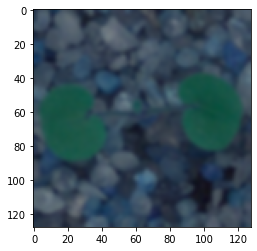

In [14]:
X_train_new = []
sets = []; getEx = True
for i in X_train:
    blurr = cv2.GaussianBlur(i,(5,5),0)
    X_train_new.append(blurr)
   # hsv = cv2.cvtColor(blurr,cv2.COLOR_BGRA2RGB)
    #GREEN PARAMETERS
    lower = (25,40,50)
    upper = (75,255,255)
 #   mask = cv2.inRange(hsv,lower,upper)
    struc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
 #   mask = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,struc)
   # boolean = mask>0
    new = np.zeros_like(i,np.uint8)
   # new[boolean] = i[boolean]
   # new_train.append(new)
X_train_new = np.asarray(X_train_new)
# CLEANED IMAGES
for i in range(1):
    plt.imshow(X_train_new[i])

### Printing the images after normalization and Gaussian blurring

In [15]:
smallfcrimgnew = []
fathenimgnew = []
spimgnew = []
cwimgnew = []
ccimgnew = []
charlockimgnew = []
climgnew = []
smimgnew = []
sbimgnew = []
maizeimgnew = []
bgimgnew = []
lsbimgnew = []

for i in range(0,4750):
    if (df.Label[i] == 'Small-flowered Cranesbill'):
           smallfcrimgnew.append(X_train_new[i]) 
    elif (df.Label[i] == 'Fat Hen'):
            fathenimgnew.append(X_train_new[i]) 
    elif (df.Label[i] == 'Shepherds Purse'):
            spimgnew.append(X_train_new[i]) 
    elif (df.Label[i] == 'Common wheat'):
            cwimgnew.append(X_train_new[i]) 
    elif (df.Label[i] == 'Common Chickweed'):
            ccimgnew.append(X_train_new[i]) 
    elif (df.Label[i] == 'Charlock'):
            charlockimgnew.append(X_train_new[i]) 
    elif (df.Label[i] == 'Cleavers'):
            climgnew.append(X_train_new[i]) 
    elif (df.Label[i] == 'Scentless Mayweed'):
            smimgnew.append(X_train_new[i]) 
    elif (df.Label[i] == 'Sugar beet'):
            sbimgnew.append(X_train_new[i]) 
    elif (df.Label[i] == 'Maize'):
            maizeimgnew.append(X_train_new[i]) 
    elif (df.Label[i] == 'Black-grass'):
            bgimgnew.append(X_train_new[i]) 
    elif (df.Label[i] == 'Loose Silky-bent'):
            lsbimgnew.append(X_train_new[i]) 

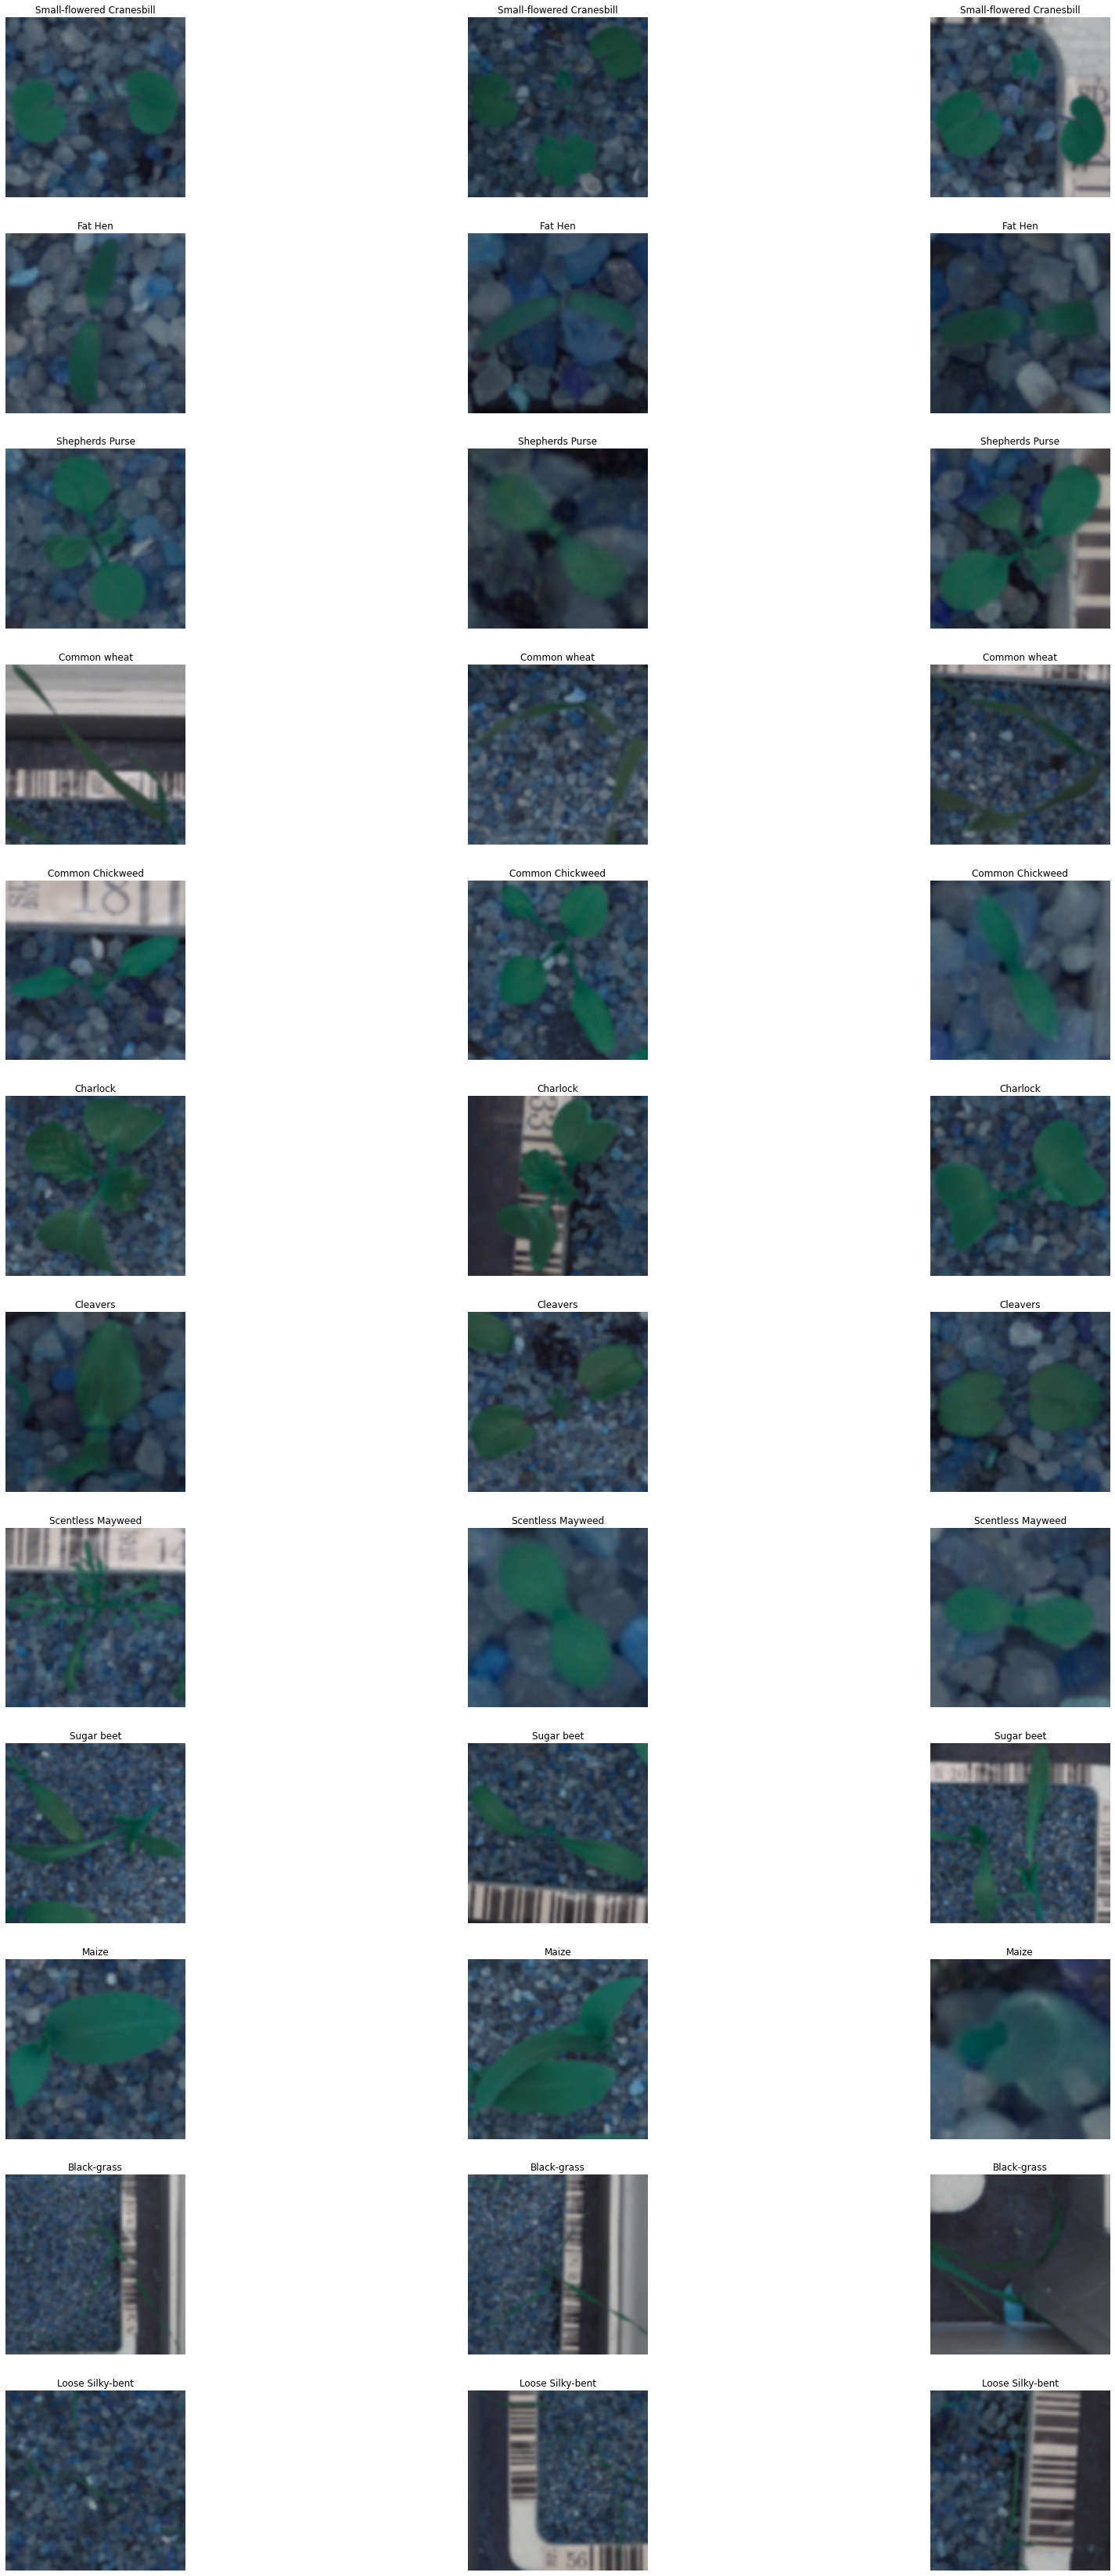

In [16]:
from keras.preprocessing import image
# plotting 2 x 3 image matrix
fig = plt.figure(figsize = (30,60))
for i in range(36):
    if i < 3:
        fp = smallfcrimgnew[i]
        label = 'Small-flowered Cranesbill'
    if i>=3 and i<6:
        fp = fathenimgnew[i-3]
        label = 'Fat Hen'
    if i>=6 and i<9:
        fp = spimgnew[i-6]
        label = 'Shepherds Purse'
    if i>=9 and i<12:
        fp = cwimgnew[i-9]
        label = 'Common wheat'
    if i>=12 and i<15:
        fp = ccimgnew[i-12]
        label = 'Common Chickweed'
    if i>=15 and i<18:
        fp = charlockimgnew[i-15]
        label = 'Charlock'
    if i>=18 and i<21:
        fp = climgnew[i-18]
        label = 'Cleavers'
    if i>=21 and i<24:
        fp = smimgnew[i-21]
        label = 'Scentless Mayweed'
    if i>=24 and i<27:
        fp = sbimgnew[i-24]
        label = 'Sugar beet'
    if i>=27 and i<30:
        fp = maizeimgnew[i-27]
        label = 'Maize'
    if i>=30 and i<33:
        fp = bgimgnew[i-30]
        label = 'Black-grass'
    if i>=33 and i<36:
        fp = lsbimgnew[i-33]
        label = 'Loose Silky-bent'
    #ax = fig.add_subplot(1, 2, i+1)
    
    # to plot without rescaling, remove target_size
    plt.subplot(12,3,i+1)
    plt.imshow(fp)    
    plt.title(label)
    plt.axis('off')
plt.show()

**Finding the mean images** for each class of tumor: 

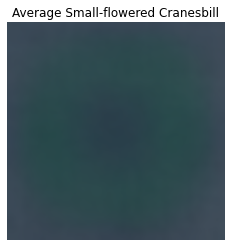

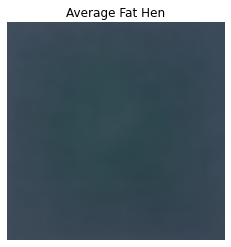

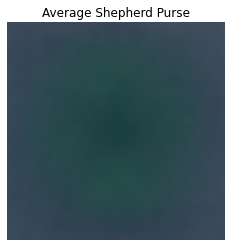

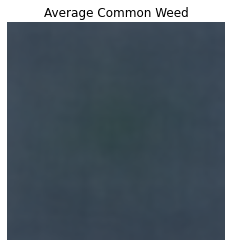

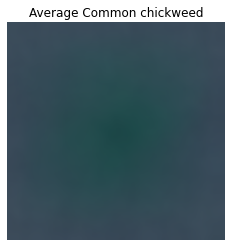

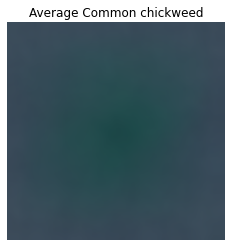

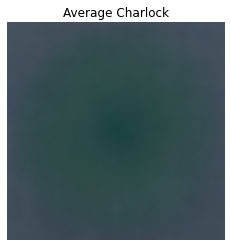

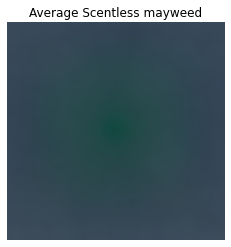

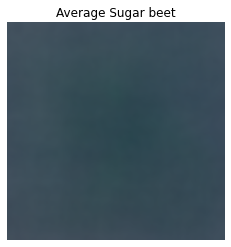

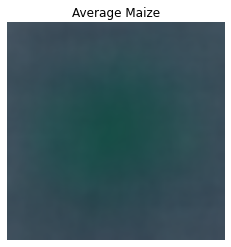

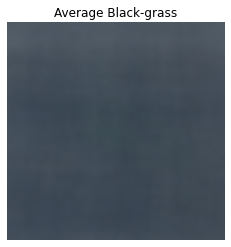

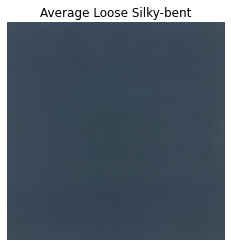

In [62]:
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    plt.imshow(mean_img)
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

            

sfc_mean = find_mean_img(np.array(smallfcrimgnew), 'Small-flowered Cranesbill')
fh_mean = find_mean_img(np.array(fathenimgnew), 'Fat Hen')
sp_mean = find_mean_img(np.array(spimgnew), 'Shepherd Purse')
cw_mean = find_mean_img(np.array(cwimgnew), 'Common Weed')
cc_mean = find_mean_img(np.array(ccimgnew), 'Common chickweed')
cc_mean = find_mean_img(np.array(ccimgnew), 'Common chickweed')
charlock_mean = find_mean_img(np.array(charlockimgnew), 'Charlock')
sm_mean = find_mean_img(np.array(smimgnew), 'Scentless mayweed')
sb_mean = find_mean_img(np.array(sbimgnew), 'Sugar beet')
maize_mean = find_mean_img(np.array(maizeimgnew), 'Maize')
bg_mean = find_mean_img(np.array(bgimgnew), 'Black-grass')
lsb_mean = find_mean_img(np.array(lsbimgnew), 'Loose Silky-bent')


### **Splitting data between training and testing**

In [18]:
from sklearn import preprocessing
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [19]:
y_train['Label'].unique()

array(['Small-flowered Cranesbill', 'Fat Hen', 'Shepherds Purse',
       'Common wheat', 'Common Chickweed', 'Charlock', 'Cleavers',
       'Scentless Mayweed', 'Sugar beet', 'Maize', 'Black-grass',
       'Loose Silky-bent'], dtype=object)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X_train_new,y_train,test_size=0.3,random_state=7,stratify=y_train)

### One hot encoding

In [21]:
y_train_n = np.asarray(y_train)
y_train_n= y_train_n.reshape((len(y_train_n), ))
le = preprocessing.LabelEncoder()
le.fit(y_train_n)
y_train_enc = le.transform(y_train_n)

In [22]:
y_test_n = np.asarray(y_test)
y_test_n= y_test_n.reshape((len(y_test_n), ))
le = preprocessing.LabelEncoder()
le.fit(y_test_n)
y_test_enc = le.transform(y_test_n)

In [68]:
y_train_c = to_categorical(y_train_enc, 12)
y_test_c = to_categorical(y_test_enc, 12)
y_train_o = to_categorical(y_train_enc)
y_test_o = to_categorical(y_test_enc)
y_train_o = to_categorical(y_train_enc)

In [70]:
print(y_train_c.shape)
print(y_test_c.shape)
print(x_train.shape)
print(y_train_o.shape)
print(y_test_o.shape)

(3325, 12)
(1425, 12)
(3325, 128, 128, 3)
(3325, 12)
(1425, 12)


In [25]:
print(y_train_enc[223])

6


In [26]:
y_train_r = y_train_enc.reshape((len(y_train_enc), 1, 1))
y_test_r = y_test_enc.reshape((len(y_test_enc), 1, 1))

### **Model Building** 

We will be using convoluation neural netwrok for model building:

- **CNN** (Convolutional Neural Network)

#### **Convolutional Neural Network (CNN)**

**Model 1:** CNN with Dropout

In [27]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model = Sequential()
#
y_train=np.array(y_train)
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 200  
batch_size = 64



es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history=model.fit(x_train, 
          y_train_c,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training  



C:\Users\appradha.ORADEV\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
42/42 [==============================] - 163s 4s/step - loss: 2.4433 - accuracy: 0.1335 - val_loss: 2.4422 - val_accuracy: 0.1338

Epoch 00001: val_accuracy improved from -inf to 0.13383, saving model to best_model.h5
Epoch 2/30
42/42 [==============================] - 175s 4s/step - loss: 2.4252 - accuracy: 0.1256 - val_loss: 2.4363 - val_accuracy: 0.1338

Epoch 00002: val_accuracy did not improve from 0.13383
Epoch 3/30
42/42 [==============================] - 177s 4s/step - loss: 2.4028 - accuracy: 0.1553 - val_loss: 2.2685 - val_accuracy: 0.2391

Epoch 00003: val_accuracy improved from 0.13383 to 0.23910, saving model to best_model.h5
Epoch 4/30
42/42 [==============================] - 175s 4s/step - loss: 2.0032 - accuracy: 0.3263 - val_loss: 1.8115 - val_accuracy: 0.3624

Epoch 00004: val_accuracy improved from 0.23910 to 0.36241, saving model to best_model.h5
Epoch 5/30
42/42 [==============================] - 184s 4s/step - loss: 1.7065 - accuracy: 0.3992 - val_loss:

In [28]:
model.evaluate(x_test,np.array(y_test_c))

45/45 [==============================] - 19s 411ms/step - loss: 0.6089 - accuracy: 0.8147


[0.6089368462562561, 0.8147368431091309]

* The Accurracy on training data is 87% and on test data is 81% for model CNN with drop out. 

#### **Convolutional Neural Network (CNN)**

**Model 2:** CNN with Dropout after Convolution and having two Dense layers with 16 & 32 units respectively 

Since CNN Model 1 gives an ok test accuracy and appears to be slighlty overfitting on the training dataset, let's use CNN Model 2, which has a different architecture that should generalize well and not overfit.

In [29]:
class conv_Layers:

  def __init__(self, nfilters, kernel_size, stride=1, 
               pool_size=2, leakyrelu_slope=0.1, dropc=0.0, bnorm=False):
    self.nfilters = nfilters
    self.kernel_size = kernel_size
    self.stride = stride
    self.pool_size = pool_size
    self.leakyrelu_slope = leakyrelu_slope
    self.dropfrac = dropc
    self.bnorm = bnorm
  
  def __call__(self, x):
    x = Conv2D(self.nfilters, kernel_size=self.kernel_size, 
               strides=self.stride, padding='same')(x)
    x = LeakyReLU(self.leakyrelu_slope)(x)
    if (self.dropfrac > 0.0): 
      x = Dropout(self.dropfrac)(x)
    if (self.bnorm):
      x = BatchNormalization()(x)
    x = MaxPool2D(self.pool_size)(x)
    return x

class dense_Layers:

  def __init__(self, nunits, leakyrelu_slope=0.1, dropd=0.0, bnorm=False):
    self.nunits = nunits
    self.leakyrelu_slope = leakyrelu_slope 
    self.dropfrac = dropd
    self.bnorm = bnorm

  def __call__(self, x):
    x = Dense(self.nunits)(x)
    x = LeakyReLU(self.leakyrelu_slope)(x)
    if (self.dropfrac > 0.0):
      x = Dropout(self.dropfrac)(x)
    if (self.bnorm):
      x = BatchNormalization()(x)
    return x

def LNmodel(in_shape, conv_filters, dense_filters, kernel_size, num_classes, lr,
            stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.0, dropd=0.0, bnorm=False):

  in_shape = X_train.shape[1:]
  i = Input(shape=in_shape)
  for ncl, nconvfilters in enumerate(conv_filters):
    if (ncl==0):
      x = conv_Layers(nconvfilters, kernel_size,
                      stride, pool_size, leakyrelu_slope, dropc, bnorm)(i)
    else:
      x = conv_Layers(nconvfilters, kernel_size,
                      stride, pool_size, leakyrelu_slope, dropc, bnorm)(x)

  x = Flatten()(x)

  for ndl, ndunits in enumerate(dense_filters):
    x = dense_Layers(ndunits, leakyrelu_slope, dropd, bnorm)(x)

  x = Dense(num_classes, activation='softmax')(x)

  ln_model  = Model(inputs=i, outputs=x)
  adam = optimizers.Adam(lr=lr)
  ln_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
  return ln_model

In [30]:
lr = 0.001
kernelsize = 5
in_shape= X_train.shape[1:]
model_ln3 = LNmodel(in_shape, [16,32], [32,16], kernelsize, 12, lr,
                    stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.30,
                    dropd=0.5, bnorm=False)
model_ln3.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 128, 128, 16)      1216      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 128, 128, 16)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128, 128, 16)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 32)        12832     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 32)        0     

In [31]:

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_model_ln3 = model_ln3.fit(x_train, y_train_c, 
                                  validation_split=0.1,
                                  verbose=1, batch_size=256,
                                  shuffle=True, epochs=60,callbacks=[es,mc])

Epoch 1/60
12/12 [==============================] - 58s 5s/step - loss: 2.4901 - accuracy: 0.1156 - val_loss: 2.4512 - val_accuracy: 0.2222

Epoch 00001: val_accuracy improved from -inf to 0.22222, saving model to best_model.h5
Epoch 2/60
12/12 [==============================] - 60s 5s/step - loss: 2.4064 - accuracy: 0.1648 - val_loss: 2.2999 - val_accuracy: 0.3123

Epoch 00002: val_accuracy improved from 0.22222 to 0.31231, saving model to best_model.h5
Epoch 3/60
12/12 [==============================] - 62s 5s/step - loss: 2.2663 - accuracy: 0.2203 - val_loss: 2.2110 - val_accuracy: 0.3093

Epoch 00003: val_accuracy did not improve from 0.31231
Epoch 4/60
12/12 [==============================] - 66s 6s/step - loss: 2.2024 - accuracy: 0.2477 - val_loss: 2.1432 - val_accuracy: 0.3423

Epoch 00004: val_accuracy improved from 0.31231 to 0.34234, saving model to best_model.h5
Epoch 5/60
12/12 [==============================] - 73s 6s/step - loss: 2.1150 - accuracy: 0.2841 - val_loss: 2.07

The accuracy of this model is 73% on training set. This model unfortunately **does not have as good training accuracy,** as compared to model1 and it appears to be **underfitting on the training dataset.** That means we need to increase the complexity of the model in our next attempt.

#### **Convolutional Neural Network (CNN)** 

**Model 3:** CNN with Dropout after Convolution and having two Dense layers with 512 & 256 Units respectively 

In [74]:
learningrate = 0.001
kernelsize = 5
model_ln4 = LNmodel(in_shape, [8,16], [256,128], kernelsize, 12, lr,
                    stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.30,
                    dropd=0.6, bnorm=False)
model_ln4.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 128, 128, 8)       608       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 128, 128, 8)       0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 64, 64, 16)        3216      
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 64, 64, 16)        0   

In [75]:

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_model_ln4 = model_ln4.fit(x_train, y_train_c, 
                                  validation_split=0.1,
                                  verbose=1, batch_size=512, 
                                  shuffle=True, epochs=35,callbacks=[es,mc])

Epoch 1/35
6/6 [==============================] - 39s 6s/step - loss: 2.8455 - accuracy: 0.1066 - val_loss: 2.4646 - val_accuracy: 0.1622

Epoch 00001: val_accuracy improved from -inf to 0.16216, saving model to best_model.h5
Epoch 2/35
6/6 [==============================] - 40s 7s/step - loss: 2.4522 - accuracy: 0.1186 - val_loss: 2.4408 - val_accuracy: 0.1502

Epoch 00002: val_accuracy did not improve from 0.16216
Epoch 3/35
6/6 [==============================] - 44s 7s/step - loss: 2.4018 - accuracy: 0.1531 - val_loss: 2.3508 - val_accuracy: 0.1712

Epoch 00003: val_accuracy improved from 0.16216 to 0.17117, saving model to best_model.h5
Epoch 4/35
6/6 [==============================] - 46s 8s/step - loss: 2.2906 - accuracy: 0.2146 - val_loss: 2.2475 - val_accuracy: 0.2282

Epoch 00004: val_accuracy improved from 0.17117 to 0.22823, saving model to best_model.h5
Epoch 5/35
6/6 [==============================] - 44s 7s/step - loss: 2.1807 - accuracy: 0.2587 - val_loss: 2.1200 - val_a

*The accuracy on the training set is a bit better than model1. This model has the best training accuracy.

### **Plotting the Train & Test Accuracy**

**CNN Model 1**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


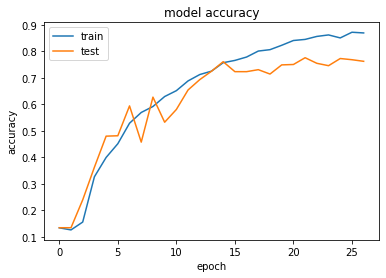

In [34]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**CNN Model 2**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


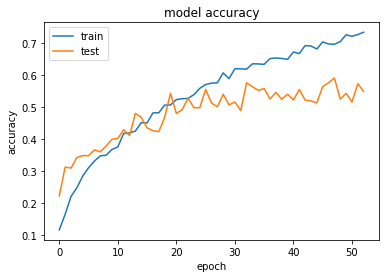

In [35]:
print(history_model_ln3.history.keys())
# summarize history for accuracy
plt.plot(history_model_ln3.history['accuracy'])
plt.plot(history_model_ln3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**CNN Model 3**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


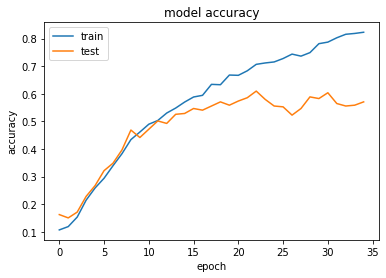

In [76]:
print(history_model_ln4.history.keys())
# summarize history for accuracy
plt.plot(history_model_ln4.history['accuracy'])
plt.plot(history_model_ln4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### **Model Evaluation**

**CNN Model 1**

In [37]:
model.evaluate(x_test,y_test_c)

45/45 [==============================] - 18s 395ms/step - loss: 0.6089 - accuracy: 0.8147


[0.6089368462562561, 0.8147368431091309]

**CNN Model 2**

In [38]:
model_ln3.evaluate(x_test,y_test_c)

45/45 [==============================] - 6s 135ms/step - loss: 1.4218 - accuracy: 0.6211


[1.4217822551727295, 0.621052622795105]

**CNN Model 3**

In [77]:
model_ln4.evaluate(x_test,y_test_c)

45/45 [==============================] - 5s 103ms/step - loss: 1.1366 - accuracy: 0.6519


[1.1366232633590698, 0.6519297957420349]

Even though Model 3 has more accuracy on training set but its accuracy on testing data is not good. It is overfitting. Model1 is coming out as the best model. It is an imbalanced dataset.So we are more concerned with **Precision and Recall**. Since these two metrics are both quite important in this scenario, we will also check the **F1 score** to try to achieve a good balance between Precision and Recall. 

### **Plotting the confusion matrix for the two best models** 

As we can see, **Model 1 and Model 3 seem to be generalizing well** because they both have a good Holdout set Accuracy. **Let us compute the confusion matrix** for these two models to understand the distribution of True Positives, False Positives, False Negatives and True Negatives.

**CNN Model 1**

In [40]:
# Test Prediction 
y_test_pred_m1 = model.predict(x_test)
y_test_pred_classes_m1 = np.argmax(y_test_pred_m1, axis=1)
y_test_pred_prob_m1 = np.max(y_test_pred_m1, axis=1)


In [41]:
y_test_labels=np.argmax(y_test_c, axis=1)
y_test_labels[1]

1

In [42]:
# Test Accuracy 
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(np.array(y_test_labels), y_test_pred_classes_m1)



0.8147368421052632

<AxesSubplot:>

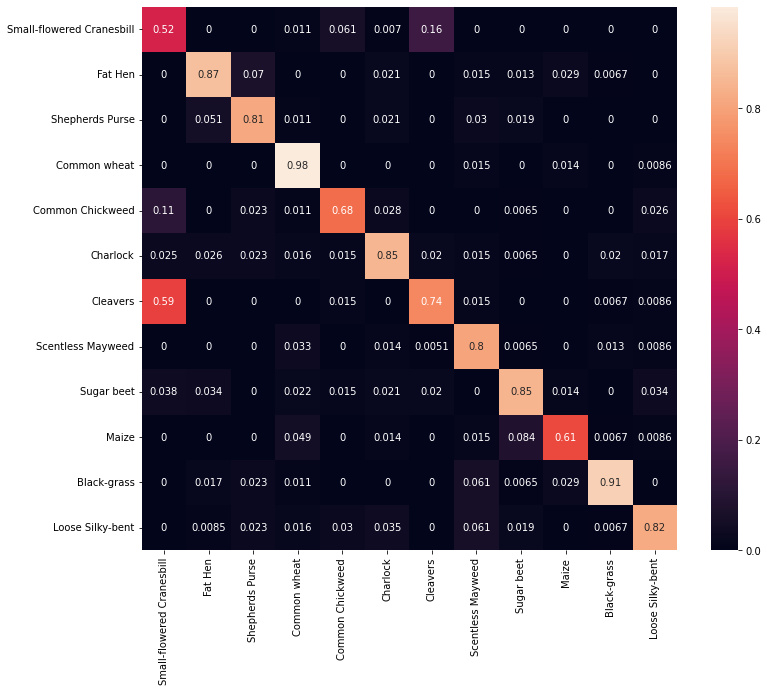

In [49]:
cf_matrix = confusion_matrix(np.array(y_test_labels), y_test_pred_classes_m1)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(12,10))
sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

**CNN Model 3**

In [79]:
#Test Prediction 

y_test_pred_ln4 = model_ln4.predict(x_test)
y_test_pred_classes_ln4 = np.argmax(y_test_pred_ln4, axis=1)
y_test_pred_prob_ln4 = np.max(y_test_pred_ln4, axis=1)

In [80]:
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(np.array(y_test_labels), y_test_pred_classes_ln4)



0.6519298245614035

<AxesSubplot:>

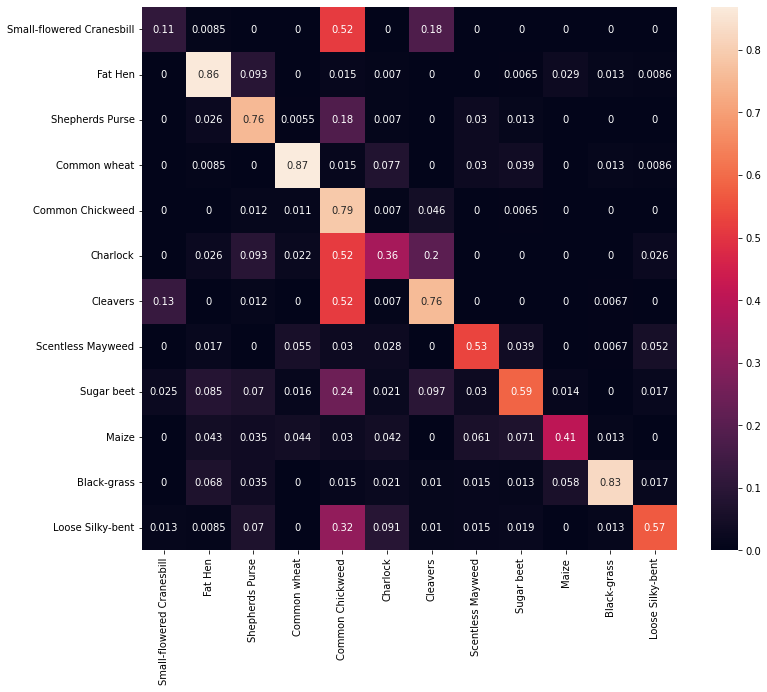

In [81]:
cf_matrix = confusion_matrix(np.array(y_test_labels), y_test_pred_classes_ln4)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(12,10))
sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

The above two confusion matrices show that the models seem to be working well. **Let's calculate the F1 score** (the harmonic mean of precision and recall), which is used as an evaluation metric for imbalanced datasets.

**Classification Report for each class** 

- **Precision:** precision is the fraction of relevant instances among the retrieved instances.

- **Recall:** recall is the fraction of relevant instances that were retrieved.

- **F-beta score:** The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0. The beta parameter determines the weight of recall in the combined score.



The order of printing the above metrices for each class is as follows:

- **Small-flowered Cranesbill**
- **Fat Hen**
- **Shepherds Purse**
- **Common wheat**
- **Common Chickweed** 
- **Charlock**
- **Cleavers**
- **Scentless Mayweed**
- **Sugar beet**
- **Maize**
- **Black-grass**
- **Loose Silky-bent**




**CNN Model 1**

In [50]:

from sklearn.metrics import precision_recall_fscore_support  

p=precision_recall_fscore_support(np.array(y_test_labels), y_test_pred_classes_m1, average=None,labels=list(np.unique(y_test_labels)))

print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

 Precision is [0.40196078 0.86440678 0.83333333 0.84507042 0.83333333 0.84027778
 0.78378378 0.77941176 0.83974359 0.875      0.93793103 0.87962963]
 Recall is [0.51898734 0.87179487 0.81395349 0.98360656 0.68181818 0.84615385
 0.73979592 0.8030303  0.84516129 0.60869565 0.91275168 0.81896552] 
 f_beta Score is [0.45303867 0.86808511 0.82352941 0.90909091 0.75       0.84320557
 0.76115486 0.79104478 0.84244373 0.71794872 0.92517007 0.84821429]


**CNN Model 3**

In [82]:

from sklearn.metrics import precision_recall_fscore_support  

p=precision_recall_fscore_support(np.array(y_test_labels), y_test_pred_classes_ln4, average=None,labels=list(np.unique(y_test_labels)))


print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

 Precision is [0.40909091 0.74814815 0.64356436 0.85026738 0.24761905 0.53684211
 0.58203125 0.74468085 0.7398374  0.8        0.92481203 0.81481481]
 Recall is [0.11392405 0.86324786 0.75581395 0.86885246 0.78787879 0.35664336
 0.76020408 0.53030303 0.58709677 0.4057971  0.82550336 0.56896552] 
 f_beta Score is [0.17821782 0.8015873  0.69518717 0.85945946 0.37681159 0.42857143
 0.65929204 0.61946903 0.65467626 0.53846154 0.87234043 0.67005076]


**Model 1 (Best) Observation**

As we see from the precision for each class, the Common wheat classifier has the highest precision. But here, **we are more concerned about the case where a seedling is wrongly classified as belonging to the weed category (False Negative).** 

**** 18% of Small flowered crainesbill, 17% belonging to Shepherd's Purse and 11% of sugar beet are not identified correctly, and the model predicts that they are weeds* - which shows that our model does not do well in identifying Small Flowered crainesbill, Shepherd's Purse and sugar beet. But it is works well for the other seedlings, where it does not classify them as weeds ****



### **Weighted F-Score**

**Model 1**

In [84]:

from sklearn.metrics import f1_score

f1_score(np.array(y_test_labels), y_test_pred_classes_m1, average='weighted')

0.8157033821513757

**Model 3**

In [85]:

from sklearn.metrics import f1_score

f1_score(np.array(y_test_labels), y_test_pred_classes_ln4, average='weighted')

0.6508960363259666

Model 1 CNN with droupout has a better F1 score.

### **Conclusion**

**There is still scope for improvement in the test accuracy and F1 score of the CNN model** chosen here. **Different architectures** can be built and **hyperparamter tuning** can be performed to obtain a better plant seedlings classifications. 

Some of the techniques which could be used for further improving the performance of the model are

* Tuning parameters like Epoch and learning rate.
* Image Data Augmentation
* Cross validation
* Deeper network topology
